In [1]:
# Import required packages
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from nltk.stem import PorterStemmer 
ps = PorterStemmer() 

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

from wordcloud import WordCloud


from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

nltk.download('stopwords')
nltk.download('wordnet')

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harshraj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/harshraj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# function for text cleaning
def processText(text):
    # From the text remove Backslash and Apostrophe
    text = re.sub("\'", "", text) 
    # From the text remove everything other than alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # From the text remove whitespaces 
    text = ' '.join(text.split()) 
    # Convert the text to lowercase 
    text = text.lower()
    
    # tokenize the text by spliting it into a list
    convText = text.split()
    
    # Perform stemming using the PorterStemmer
    convText = [ps.stem(word) for word in convText]
    
    # Perform lemmatization using the WordNetLemmatizer
    convText = [wordnet_lemmatizer.lemmatize(word) for word in convText]
    
    # Convert the list of words to a single string
    text = ' '.join(convText)
    return text

In [3]:
# Read the preprocessed dataset into the input dataframe
input_df = pd.read_csv("output.csv")
input_df.describe()

,movie_name,genres
count,199280,199280
unique,173598,1270
top,Broken,['drama']
freq,27,31490


In [4]:
# Check if the dataset which has been read is correct by reading the first five rows
input_df.head()


,movie_name,genres
0,Miss Jerry,['romance']
1,Hamlet,['drama']
2,The Fairylogue and Radio-Plays,"['adventure', 'fantasy']"
3,"Hamlet, Prince of Denmark",['drama']
4,The Life of Moses,"['biography', 'drama', 'family']"


In [5]:
# As the type of genres is a string we need to convert it to list structure
print(type(input_df['genres'][0]))

<class 'str'>


In [6]:
# Convert string to list
# Also populate an array to have all the genres in the dataset to visualize 
totalGenres = []
allGenres = []
for row in input_df['genres']:
    if row:
        temp = []
        #Remove the 
        curstr = row[1:-1]
        curGenres = curstr.split(',')
        for eachGenre in curGenres:
            allGenres.append(eachGenre.strip())
            temp.append(eachGenre.strip())
        totalGenres.append(temp)

input_df['new_genres'] = totalGenres

input_df


,movie_name,genres,new_genres
0,Miss Jerry,['romance'],['romance']
1,Hamlet,['drama'],['drama']
2,The Fairylogue and Radio-Plays,"['adventure', 'fantasy']","['adventure', 'fantasy']"
3,"Hamlet, Prince of Denmark",['drama'],['drama']
4,The Life of Moses,"['biography', 'drama', 'family']","['biography', 'drama', 'family']"
...,...,...,...
199275,Liebestraum,['musical'],['musical']
199276,The unknown project title at this time,['comedy'],['comedy']
199277,Minotaur,['thriller'],['thriller']
199278,Coven,"['drama', 'history', 'horror']","['drama', 'history', 'horror']"


In [7]:
# Remove the rows where there are not genres as they don't provide any value to our analysis
input_df_new = input_df[~(input_df['new_genres'].str.len() == 0)]
input_df

,movie_name,genres,new_genres
0,Miss Jerry,['romance'],['romance']
1,Hamlet,['drama'],['drama']
2,The Fairylogue and Radio-Plays,"['adventure', 'fantasy']","['adventure', 'fantasy']"
3,"Hamlet, Prince of Denmark",['drama'],['drama']
4,The Life of Moses,"['biography', 'drama', 'family']","['biography', 'drama', 'family']"
...,...,...,...
199275,Liebestraum,['musical'],['musical']
199276,The unknown project title at this time,['comedy'],['comedy']
199277,Minotaur,['thriller'],['thriller']
199278,Coven,"['drama', 'history', 'horror']","['drama', 'history', 'horror']"


In [8]:
input_df_new.describe()

,movie_name,genres,new_genres
count,199280,199280,199280
unique,173598,1270,1270
top,Broken,['drama'],['drama']
freq,27,31490,31490


In [9]:
# Use the inbuilt nltk package to get the number of times a genre has occured in the dataset
allGenres = nltk.FreqDist(allGenres) 

In [10]:
# Conver to a dataframe
all_genres_df = pd.DataFrame({'Genre': list(allGenres.keys()), 
                              'Count': list(allGenres.values())})

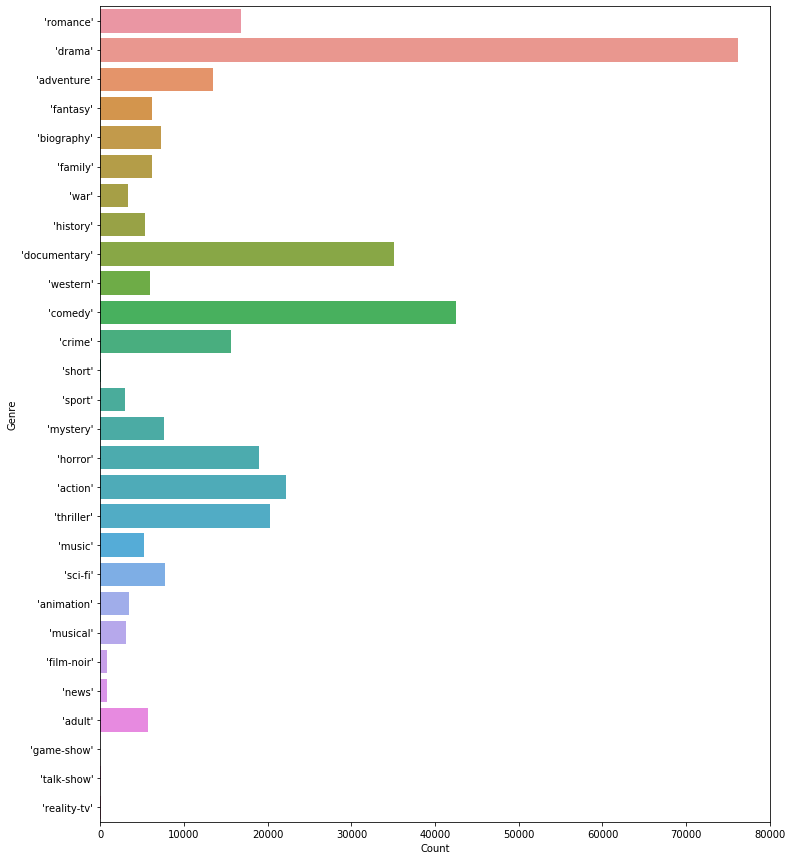

In [11]:
# Visualize genres 
plt.figure(figsize=(12,15)) 
axis = sns.barplot(data=all_genres_df, x= "Count", y = "Genre") 
axis.set(ylabel = 'Genre') 
plt.show()

In [12]:
# Clean the movie title by using the processing function
input_df['movie_name_clean'] = input_df['movie_name'].apply(lambda x: processText(x))

In [13]:
#Snapshot of the new dataset
input_df.head()

,movie_name,genres,new_genres,movie_name_clean
0,Miss Jerry,['romance'],['romance'],miss jerri
1,Hamlet,['drama'],['drama'],hamlet
2,The Fairylogue and Radio-Plays,"['adventure', 'fantasy']","['adventure', 'fantasy']",the fairylogu and radio play
3,"Hamlet, Prince of Denmark",['drama'],['drama'],hamlet princ of denmark
4,The Life of Moses,"['biography', 'drama', 'family']","['biography', 'drama', 'family']",the life of mose


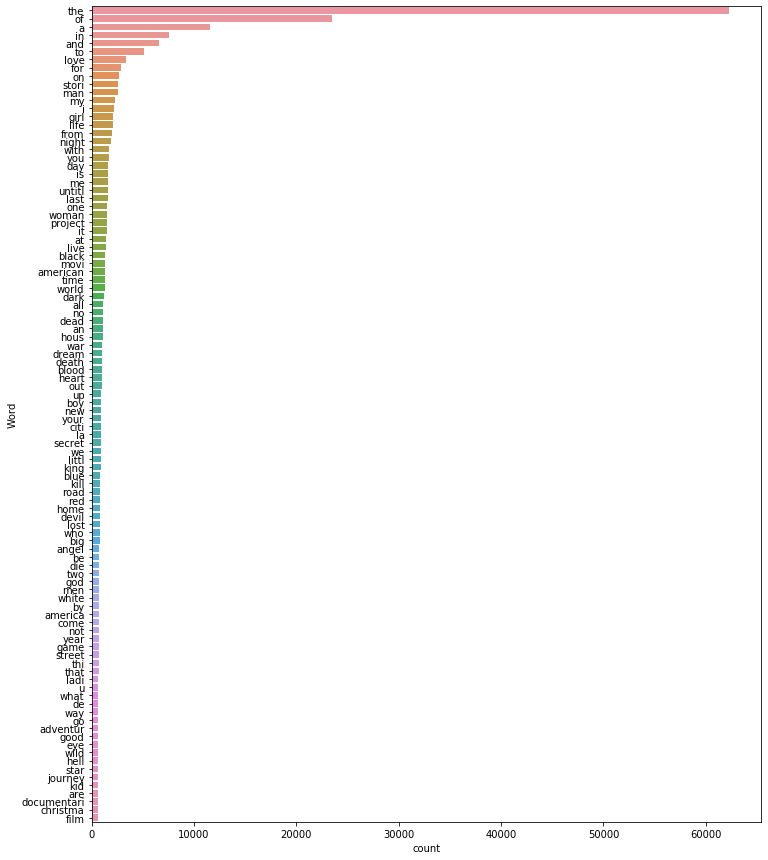

In [14]:
def freq_words(x, terms = 30): 
  totalWords = ' '.join([text for text in x]) 
  totalWords = totalWords.split() 
  wordFrequency = nltk.FreqDist(totalWords) 
  words_df = pd.DataFrame({'word':list(wordFrequency.keys()), 'count':list(wordFrequency.values())}) 
  
  # Select the top words 
  topWords = words_df.nlargest(columns="count", n = terms) 
  
  # Visualize the data 
  plt.figure(figsize=(12,15)) 
  axis = sns.barplot(data=topWords, x= "count", y = "word") 
  axis.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(input_df['movie_name_clean'], 100)

In [15]:
# Remove stopwords
def removeSW(text):
    convText = [w for w in text.split() if not w in stop_words]
    return ' '.join(convText)

input_df['movie_name_clean'] = input_df['movie_name_clean'].apply(lambda t: removeSW(t))

In [16]:
# Function to generate world cloud 
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.axis("off");

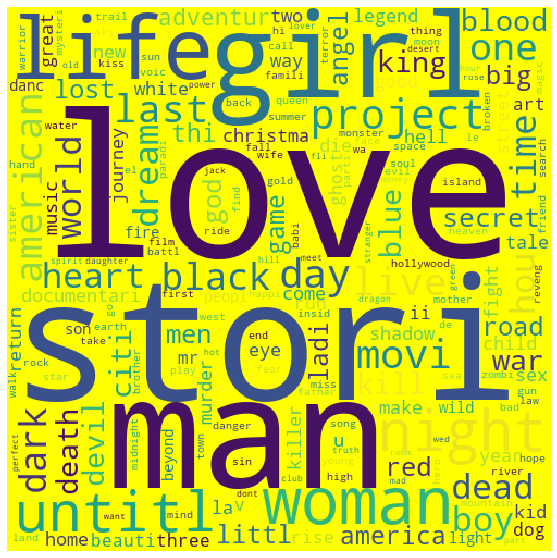

In [17]:
# Generate a word cloud to visualize the top words after removing stop words
all_words = ' '.join([text for text in input_df['movie_name_clean']]) 
wordcloud = WordCloud(width = 500, height = 500, background_color='yellow', random_state=10).generate(all_words)
plot_cloud(wordcloud)

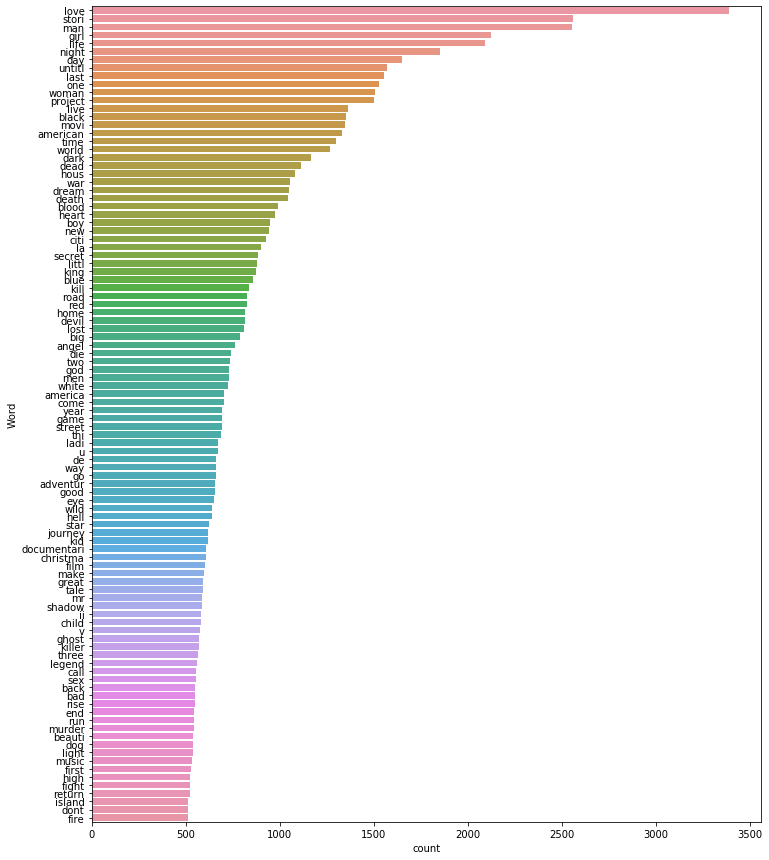

In [18]:
# Generate a bar plot for the cleaned movie title column after removing the stopwords
freq_words(input_df['movie_name_clean'], 100)

In [19]:
# One-hot encoding the genres column
multilabelBinarizer = MultiLabelBinarizer()
multilabelBinarizer.fit(input_df['new_genres'])

y = multilabelBinarizer.transform(input_df['new_genres'])

In [20]:
# Use the TFIDF method to generate the vectors
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=100000)

In [21]:
# Split the data into training and test set. We are using the 
xtrain, xval, ytrain, yval = train_test_split(input_df['movie_name_clean'], y, test_size=0.1)

In [22]:
# Transform the movie title to vectors using the TFIDF methods
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [23]:
# Use a Support vector machine to train the model
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

svm_model = OneVsRestClassifier(LinearSVC())
svm_model.fit(xtrain_tfidf, ytrain)
# f1 score of support vector machine
y_pred = svm_model.predict(xval_tfidf)
f1_score(yval, y_pred, average="micro")

0.2541581097244477

In [24]:
def testPrediction(movieTitle):
    movieTitle = processText(movieTitle)
    movieTitle = removeSW(movieTitle)
    movieTitleVec = tfidf_vectorizer.transform([movieTitle])
    testPred = svm_model.predict(movieTitleVec)
    return multilabelBinarizer.inverse_transform(testPred)

In [25]:
# Now let's look at some predictions
for i in range(15):
    k = xval.sample(1).index[0]
    if testPrediction(xval[k]) != [()]:
        print("Movie Title: ", input_df['movie_name'][k], "\nPredicted genre: ", testPrediction(xval[k])), print("Actual genre: ",input_df['new_genres'][k], "\n")


Movie Title:  Professional Soldier 
Predicted genre:  [("'drama'",)]
Actual genre:  ["'action'", "'adventure'", "'drama'"] 

Movie Title:  Crossroads of the Atlantic 
Predicted genre:  [("'drama'",)]
Actual genre:  ["'documentary'"] 

Movie Title:  Ticket to a Crime 
Predicted genre:  [("'crime'",)]
Actual genre:  ["'action'", "'crime'", "'mystery'"] 

Movie Title:  Beach Party 
Predicted genre:  [("'comedy'",)]
Actual genre:  ["'comedy'", "'musical'", "'romance'"] 

Movie Title:  Ghetto Stories 
Predicted genre:  [("'documentary'",)]
Actual genre:  ["'drama'"] 

Movie Title:  Between Lovers 
Predicted genre:  [("'drama'",)]
Actual genre:  ["'adult'"] 

Movie Title:  Charlie Two Shoes 
Predicted genre:  [("'comedy'", "'drama'")]
Actual genre:  ["'drama'"] 

Movie Title:  The Life of One 
Predicted genre:  [("'drama'",)]
Actual genre:  ["'documentary'"] 



In [26]:
# classification report
print(metrics.classification_report(yval, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.12      0.19      2154
           1       0.50      0.12      0.20       576
           2       0.46      0.09      0.15      1354
           3       0.62      0.09      0.16       317
           4       0.23      0.02      0.04       703
           5       0.48      0.18      0.26      4130
           6       0.38      0.05      0.08      1595
           7       0.61      0.23      0.33      3596
           8       0.53      0.34      0.41      7657
           9       0.40      0.04      0.08       598
          10       0.27      0.03      0.05       651
          11       0.00      0.00      0.00        87
          12       0.00      0.00      0.00         1
          13       0.09      0.01      0.01       548
          14       0.60      0.24      0.35      1954
          15       0.31      0.04      0.07       515
          16       0.10      0.01      0.01       336
          17       0.27    

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [27]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(
    yval.argmax(axis=1), y_pred.argmax(axis=1))

array([[1424,    4,   36,    1,    3,   79,   16,   54,  374,    1,    4,
           0,    0,    2,   73,    0,    1,    3,    0,    0,    1,   11,
           1,    0,   14,    0,   52],
       [ 293,   70,    0,    0,    1,   53,    3,   10,  129,    0,    0,
           0,    0,    0,   10,    0,    0,    0,    0,    0,    2,    1,
           0,    0,    0,    0,    2],
       [ 477,    0,   50,    6,    1,   42,    5,   32,  129,    1,    6,
           0,    0,    0,   22,    0,    0,    2,    0,    0,    0,    5,
           2,    0,    2,    0,   12],
       [ 114,    0,    5,    5,    1,   22,    0,    6,   25,    7,    0,
           0,    0,    0,    6,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    1],
       [ 333,    2,    4,    1,   12,   44,    4,  106,  129,    0,    0,
           0,    0,    0,   10,    3,    1,    0,    0,    0,    0,    1,
           1,    0,    0,    0,    0],
       [1820,   20,   16,    1,   13,  638,   18,  101,  733,    